## Probability Distribution

### The Uniform Distribution

The uniform distribution is a probability distribution where all outcomes have the same probability of occurring. In other words, each event in the set of possibilities is equally likely. There are two main types: **the continuous uniform distribution**, where this equivalence occurs over a continuous interval (such as between two numbers a and b), and the **discrete uniform distribution**, where it applies to a discrete set of elements, such as the faces of a die. This distribution is often used to model situations of equiprobability, where no outcome is favored over another.

$$ \huge X \sim U(a, b) $$


$$\large f(x) = 
\begin{cases} 
\frac{1}{b - a} & \text{for } a \leq x \leq b, \\
0 & \text{Otherwise}
\end{cases} $$

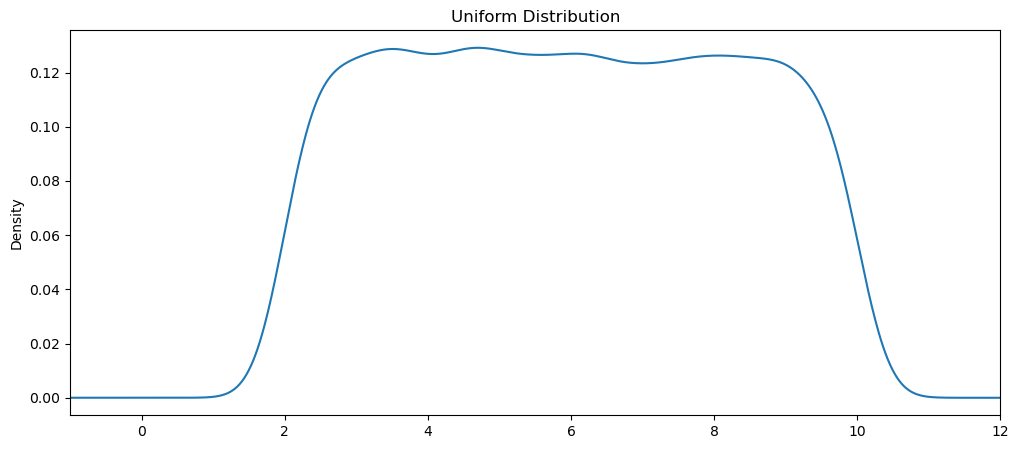

In [1]:
import random
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# The Uniform Distribution
uniform = np.random.uniform(low = 2,
                            high = 10,
                            size = 10000)

pd.DataFrame(uniform).plot(kind = 'density',
                           figsize = (12, 5), 
                           xlim = (-1, 12), title = 'Uniform Distribution', legend = None);

**We see that we have a flat or uniform distribution where all values falling within the range we have given (0, 5) have roughly the same chances of occurring (20% chance).**


### The Normal Distribution

The normal distribution, commonly called the bell curve, is one of the most important distributions in statistics due to its ubiquitous presence in many natural and social phenomena. Its symmetrical shape is centered around the mean, denoted $\mu$, and its spread is determined by the standard deviation, denoted $\sigma$. What particularly characterizes the normal distribution is that 68% of the data is within one standard deviation ($\sigma$) of the mean, about 95% are within two standard deviations ($2\sigma$), and about 99.7% are within three standard deviations ($3\sigma$). This rule is often known as the empirical rule or the 68-95-99.7 rule. This distribution is fundamental in many fields, as it serves as the basis for statistical inference, allowing generalizations and predictions to be made from data samples.



$$ X \huge \sim \mathcal{N}(\mu, \sigma^2) $$

$$ \large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right) $$



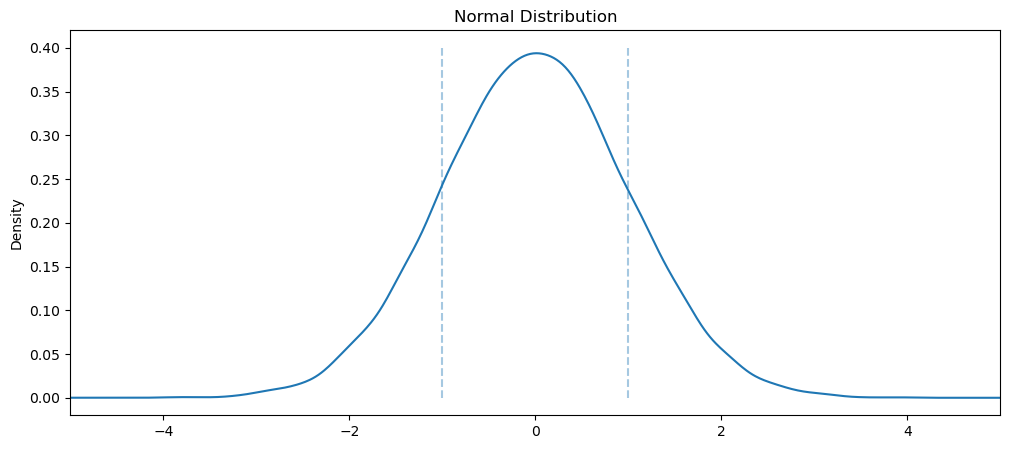

In [89]:
# normal distribution
np.random.seed(42)

normal = np.random.normal(loc = 0.0,     # Mean of the distribution
                          scale = 1.0,   # Standard deviation of the distribution
                          size = 10000)     

pd.DataFrame(normal).plot(kind = 'density',
                           figsize = (12, 5), 
                           xlim = (-5, 5), title = 'Normal Distribution', legend = None)
plt.vlines(x = -1, ymin=0, ymax = 0.4, ls = '--', alpha = 0.4)
plt.vlines(x = 1, ymin=0, ymax = 0.4, ls = '--', alpha = 0.4);

**The `skew()` method calculates the "skewness" (asymmetry) of a distribution for a data series or set.**

* *Zero Skewness:* A skewness value close to zero indicates that the distribution of data is relatively symmetric. In a perfectly symmetric distribution, half of the values are below the mean and the other half above.

* *Positive Skewness:* A positive skewness (sometimes called "right skewness") means that the tail of the distribution is longer or more stretched out on the right side of the mean, resulting in a majority of values lying below the mean. 

* *Negative Skewness:* A negative skewness (or "left skewness") means that the tail of the distribution is longer on the left side, indicating that the majority of values are above the mean.

In [90]:
pd.DataFrame(normal).skew() # very slightly more value under average.

0    0.001964
dtype: float64

In [91]:
# we can verify this assumption 

(pd.DataFrame(normal) > np.mean(normal)).replace({True : 'Bigger Than the Mean', False : 'Lower Than the Mean'}).value_counts()

Lower Than the Mean     5003
Bigger Than the Mean    4997
dtype: int64

**Cela signifie que votre distribution est très légèrement asymétrique vers la droite. Cependant, une valeur d'asymétrie aussi proche de zéro suggère que la distribution des données est à peu près symétrique.**

In [129]:
# Combien d'observations se trouvent en dessous de -1 ?
from scipy.stats import norm

norm.cdf(x = -1, 
         loc = 0.0,
         scale = 1.0)  # 15% de la data se trouvent en dessous de -1 

0.15865525393145707

In [98]:
# Quelle est la valeur pour laquelle 2,5% des observations se trouvent en dessous ?

# Seuil de probabilité
quantile = 0.025  # 2,5%

norm.ppf(quantile,
         loc=0,
         scale=1)

-1.6448536269514729

In [113]:
# Quelle est la densité des données au point 1 ?

norm.pdf(x = 1, 
         loc=1, 
         scale=1)

0.3989422804014327

**La densité des donnée au point 1 alors que la moyenne est de 1 signifie que la densité la plus élevé est de 0.39.** 

In [126]:
for i in range(-2, 4):
    print(f"{i:>5}: {norm.pdf(x = i, loc=1, scale=1)}")   

   -2: 0.0044318484119380075
   -1: 0.05399096651318806
    0: 0.24197072451914337
    1: 0.3989422804014327
    2: 0.24197072451914337
    3: 0.05399096651318806


****We can see symmetry in the density. The density is maximum when the given point is close to the mean and decreases as we move away from it. This means, in other words, that most observations occur around the mean, a logical fact in a normal distribution.**l**

### The Binomial Distribution

The binomial distribution is a discrete probability distribution that describes the number of successes in a sequence of $n$ independent Bernoulli trials (such as coin flips) with the same probability of success $p$. If $X$ is a random variable representing the number of successes, we write $X \sim B(n, p)$. This distribution is useful for modeling situations where there are two possible outcomes (such as "success" and "failure") for each trial, and we are interested in the number of successes over a fixed number of trials.

$$ \huge X \sim B(n, p) $$

$$ \large P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $$


In [40]:
binomial = np.random.binomial(n = 10,     # number of try 
                              p = 0.5,   # probability of success (if 0.5 the probabilities are equal)
                              size = 5000)  

pd.crosstab(index = 'Count', columns = binomial)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
Count,4,49,207,525,1030,1277,1020,623,215,46,4


**Let's take the example of a coin, knowing that it is not rigged (p = 0.5), and toss it 10 times. Let's assume that heads is a success and tails is a failure. The probability of having 0 successes out of 10 tosses is very low, just like having 10 successes out of 10 tosses. If the probability is 50%, we will observe the Binomial law approaching a normal distribution as we will obtain results around 4, 5, 6 successes.**

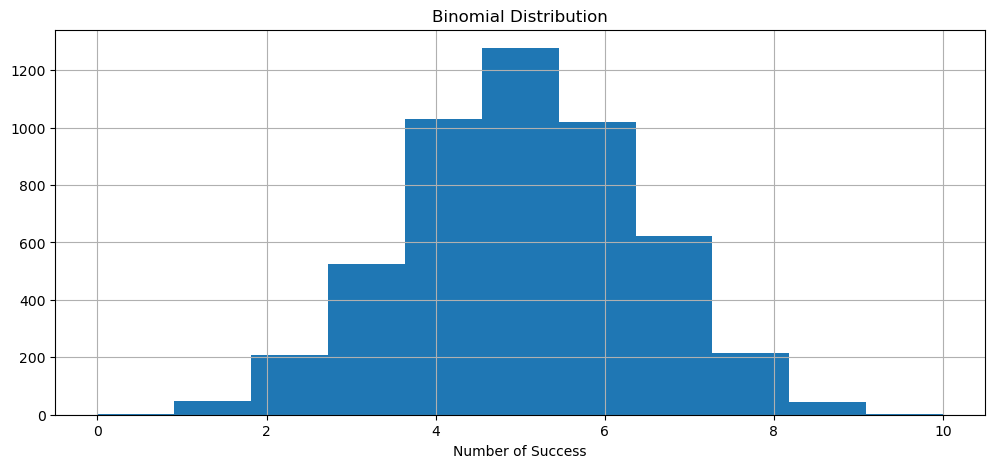

In [43]:
pd.DataFrame(binomial).hist( figsize = (12, 5), bins = 11)
plt.title('Binomial Distribution')
plt.xlabel('Number of Success');

**If the probability of success is 10%, then we will have a histogram tilting to the left, because the successes will be around 0, 1, 2. Conversely if the probability of success is 90%, then we will have a histogram tilting towards the right, because the successes will be around 8, 9, 10**

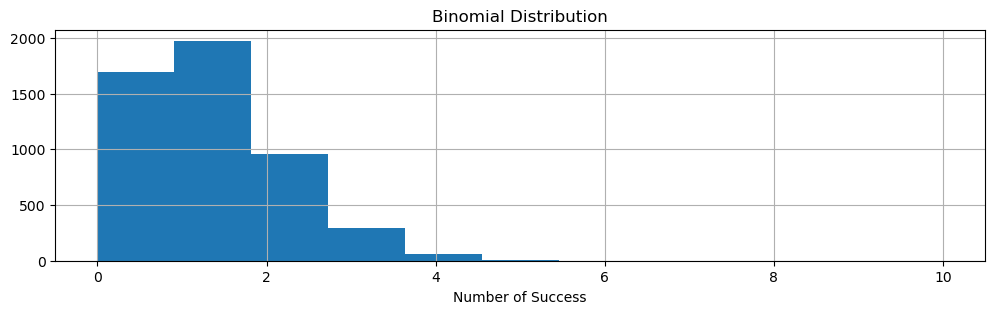

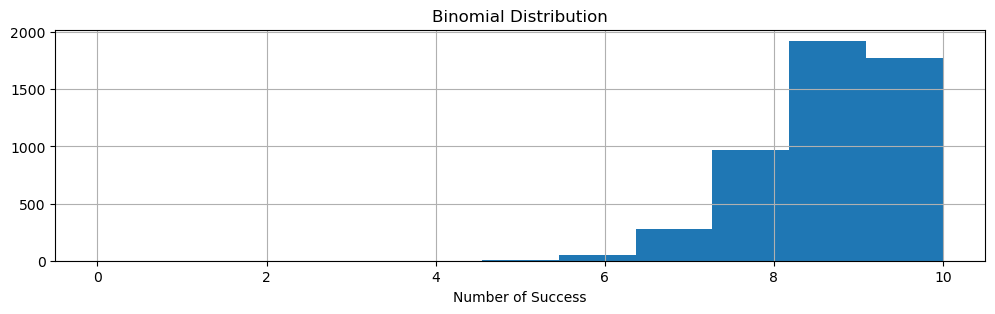

In [54]:
lst = [0.1, 0.9]
for element in lst:
    binomial2 = np.random.binomial(n = 10,    
                                  p = element,   
                                  size = 5000)

    pd.DataFrame(binomial2).hist( figsize = (12, 3), range = (0, 10), bins = 11)
    plt.title('Binomial Distribution')
    plt.xlabel('Number of Success');    

In [59]:
from scipy.stats import binom

binom.cdf(k = 5,       # probability of k success or less
          n = 10, 
          p = 0.5)

0.623046875

In [57]:
1 - binom.cdf(k = 5,     # probability of k success or more
              n = 10, 
              p = 0.5)

0.376953125

In [60]:
binom.pmf(k = 5,       # probability of k success exactly
          n = 10, 
          p = 0.5)

0.24609375000000003

### The Geometric and Exponential Distribution

Les distributions géométriques et exponentielles modélisent le temps nécessaire pour qu'un évenement se produise. La distributions géométrique modélise le nombre d'essais necessaires dans une experience pour que l'on répéte un nombre X de fois avec une probabilité de succès donné. 

Quand a la distribution exponentielles elle est un peu une suite de la distribution géométrique sauf qu'elle ne modèlise pas ne nombre d'essais necessaires mais le temps qu'il faudrait attendre avant qu'un événement se produise étant donné un certain taux d'occurence. 

$$ \huge X \sim G(k, p) $$


$$ \large P(X = k) = (1-p)^k \times p $$

In [103]:
# Each sample represents the total number of attempts required to achieve a first success
geometric = np.random.geometric(p = 0.5,       # probability of success in a single attempt
                    size = 10000)

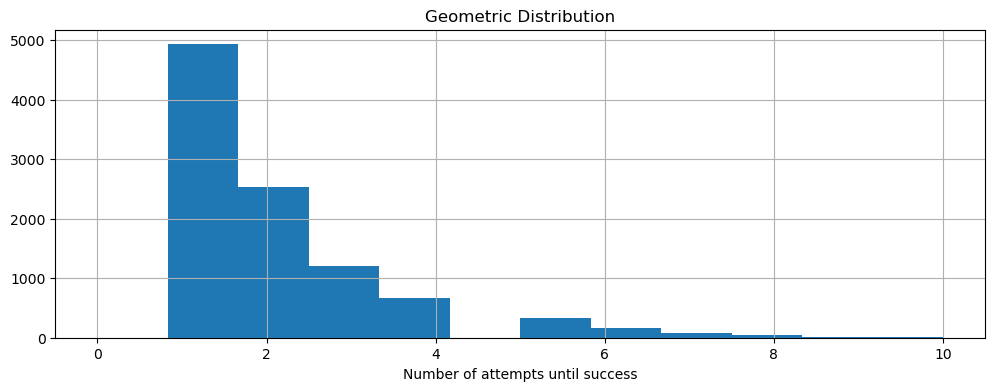

In [111]:
pd.DataFrame(geometric).hist( figsize = (12, 4), range = (0, 10), bins = max(geometric) + 1, legend = None)
plt.xlabel('Number of attempts until success')
plt.title('Geometric Distribution');

**We see that the greater the probability of success, the lower the number of attempts.**

In [137]:
from scipy.stats import geom, expon

geom.cdf(k = 5,        # Prob of success in first 5 flips
         p = 0.3)

0.83193

In [138]:
geom.pmf(k = 2,       # Prob to get excatly 2 flip to get first success
         p = 0.8) 

0.15999999999999998

## Exponential

$$ \huge X \sim \text{Exp}(\lambda)$$

$$ \large f(x) = \lambda e^{-\lambda x} $$

**Let's give a simple example: if the average wait time at the doctor's office is 10 minutes, what is the probability of getting there before or in 5 minutes?**

In [205]:
expon.cdf(x = 5,          # Prob to wait 5 min (that the truth is found in this time - sur que ca se trouve dans cette intervalle).
         scale = 10)       # lambda (how many time event occuring)

0.3934693402873666

La probabilité que le temps d'attente, $X$, soit entre 5 et 8 minutes dans une distribution exponentielle est calculée en soustrayant la fonction de répartition cumulative (CDF) à 5 minutes de celle à 8 minutes. Cela peut être formulé comme :

$$\large P(a < X \leq b) = CDF(b) - CDF(a) $$

In [229]:
x_values = np.arange(0, 20, 0.01)

between0_to5 = expon.cdf(x = 5, scale=  10) - expon.cdf(x = 0, scale=  10) 
between5_to8 = expon.cdf(x = 10, scale=  10) - expon.cdf(x = 5, scale=  10) 
between10_to15 = expon.cdf(x = 15, scale=  10) - expon.cdf(x = 10, scale=  10) 
between15_to20 = expon.cdf(x = 20, scale=  10) - expon.cdf(x = 15, scale=  10) 
between20_to25 = expon.cdf(x=25, scale=10) - expon.cdf(x=20, scale=10)
between25_to30 = expon.cdf(x=30, scale=10) - expon.cdf(x=25, scale=10)
prob_greater_than_30 = 1 - expon.cdf(x=30, scale=10)

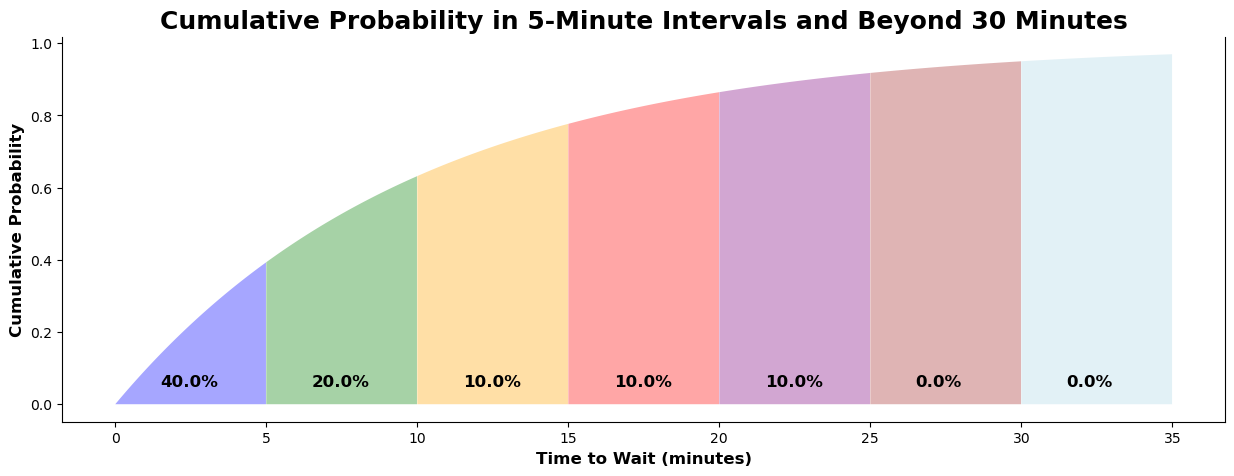

In [232]:
x_values = np.arange(0, 35, 0.01)
cdf_values = expon.cdf(x_values, scale=10)

# Création du graphique
plt.figure(figsize=(15, 5))

# Colorer chaque intervalle de temps
intervals = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35)]
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'lightblue']

for (start, end), color in zip(intervals, colors):
    plt.fill_between(x=x_values[np.logical_and(x_values >= start, x_values < end)], 
                     y1=cdf_values[np.logical_and(x_values >= start, x_values < end)],
                     facecolor=color, alpha=0.35)
    # Calculer et afficher la probabilité pour chaque intervalle
    if end != 35:  # Pour tous les intervalles sauf le dernier
        prob = expon.cdf(x=end, scale=10) - expon.cdf(x=start, scale=10)
    else:  # Pour le dernier intervalle (> 30 minutes)
        prob = prob_greater_than_30
    plt.text(x=(start + end) / 2 - 1, y=0.05, s=f'{round(prob, 1) * 100}%', fontsize=12, fontweight='bold')

# Ajouter des labels et un titre
plt.xlabel('Time to Wait (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
plt.title("Cumulative Probability in 5-Minute Intervals and Beyond 30 Minutes", fontsize=18, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.show()

**This graph visually represents the cumulative probabilities for different time intervals in an exponential distribution with a scale parameter of 10. It illustrates the likelihood of an event occurring within specific 5-minute intervals, up to 25 minutes. Each color-coded section on the graph corresponds to a time interval (0-5, 5-10, 10-15, 15-20, and 20-25 minutes), showing the increasing probability of the event occurring as time progresses. The percentages within each section indicate the probability of the event happening within that specific interval, highlighting how the likelihood accumulates over time in an exponential process.**